In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd
import numpy as np

from IPython.display import display, HTML

##### search font familys can be used by matplotlib

In [3]:
from matplotlib import font_manager
font_set = {f.name for f in font_manager.fontManager.ttflist}
for f in font_set:
    if 'TW' in f or 'CN' in f:
        print(f)
    

AR PL UKai CN
AR PL UMing CN


In [4]:
mpl.rcParams['font.sans-serif'] = ['AR PL UKai CN']
mpl.rcParams['font.family'] = 'AR PL UKai CN'

In [5]:
course_chapter_items_df = pd.read_csv('./data/course_chapter_items.csv')
course_df = pd.read_csv('./data/courses.csv')
users_df = pd.read_csv('./data/users.csv')
subgroups_df = pd.read_csv('./data/subgroups.csv')

train_group_df = pd.read_csv('./data/train_group.csv')
test_seen_group_df = pd.read_csv('./data/test_seen_group.csv')
val_seen_group_df = pd.read_csv('./data/val_seen_group.csv')
test_unseen_group_df = pd.read_csv('./data/test_unseen_group.csv')
val_unseen_group_df = pd.read_csv('./data/val_unseen_group.csv')

train_df = pd.read_csv('./data/train.csv')
test_seen_df = pd.read_csv('./data/test_seen.csv')
val_seen_df = pd.read_csv('./data/val_seen.csv')
test_unseen_df = pd.read_csv('./data/test_unseen.csv')
val_unseen_df = pd.read_csv('./data/val_unseen.csv')

## 自建工具

In [6]:
def check_row_number_with_unique_amount(df, df_name, column):
    nrow = df.shape[0]
    nunique = pd.unique(df.loc[:,column]).shape[0]
    msg = f'dataframe {df_name} row number != unique {column} amount'
    assert nrow == nunique, msg
    print(f'dataframe {df_name} row number == unique {column} amount ({nrow} == {nunique})')

def check_unique_items_are_same_set(df1, df1_name, df1_column, df2, df2_name, df2_column):
    df1_set = set(df1.loc[:,df1_column].to_list())
    df2_set = set(df2.loc[:,df2_column].to_list())
    diff = df1_set.symmetric_difference(df2_set)
    msg = f'unique {df1_name}.{df1_column} & unique {df2_name}.{df2_column} are different'
    assert len(diff) == 0, msg
    print(f'unique {df1_name}.{df1_column} & unique {df2_name}.{df2_column} are the same')

def long_series_fold_view(series, nrow=10, index_start_from=0):
    series = series.to_list()
    sta = 0 
    length = len(series)
    clips = []
    col_names = []
    for end in range(0, length, nrow):
        if end == 0:
            continue
        clips.append(series[sta :end])
        col_names.append(f"{sta+index_start_from}_{end+index_start_from-1}")
        sta = end
    else:
        if end < length:
            clips.append(series[end:])
            clips[-1] += [None]*(nrow-(length-end) )
            col_names.append(f"{end}_{end+nrow}")

    df = pd.DataFrame({f"{col_name}": clip for col_name, clip in zip(col_names, clips)})
    df.index = df.index + index_start_from

    return df

def sub_eda1(df, columns):
    for column in columns:
        view=df[[column]].describe()
        display(view)

        N = df[column].describe()['max']
        N = int(N)
        ax = df.plot.hist(column=[column], bins=100, xticks=range(0,N,100), figsize=(20,5), title=column)
        ax.tick_params(axis='x', rotation=45)

def sub_eda2(df, columns):
    for column in columns:
        print(f'column: {columns}')
        print(f'.describe():')
        view = df[[column]].describe()
        display(view)

        print(f'.value_counts().describe():')
        view = pd.DataFrame({column:df[column].value_counts()}).describe()
        display(view)

        print(f'.value_counts() fold view:')
        view = long_series_fold_view(df[column].value_counts(), nrow=10, index_start_from=1)
        display(view)
        
        print(f'.value_counts().plot()')
        df[column].value_counts().plot(figsize=(20,5))
        plt.show()

def series_bar(series, column):
    series.plot.bar(figsize=(20,5), title=f'{column}')
    plt.show()


# 敘述統計

## course_chapter_items

#### video_length_in_seconds

,video_length_in_seconds
count,19371.000000
mean,676.775592
std,575.299559
min,2.000000
25%,312.000000
50%,533.000000
75%,857.000000
max,7466.000000


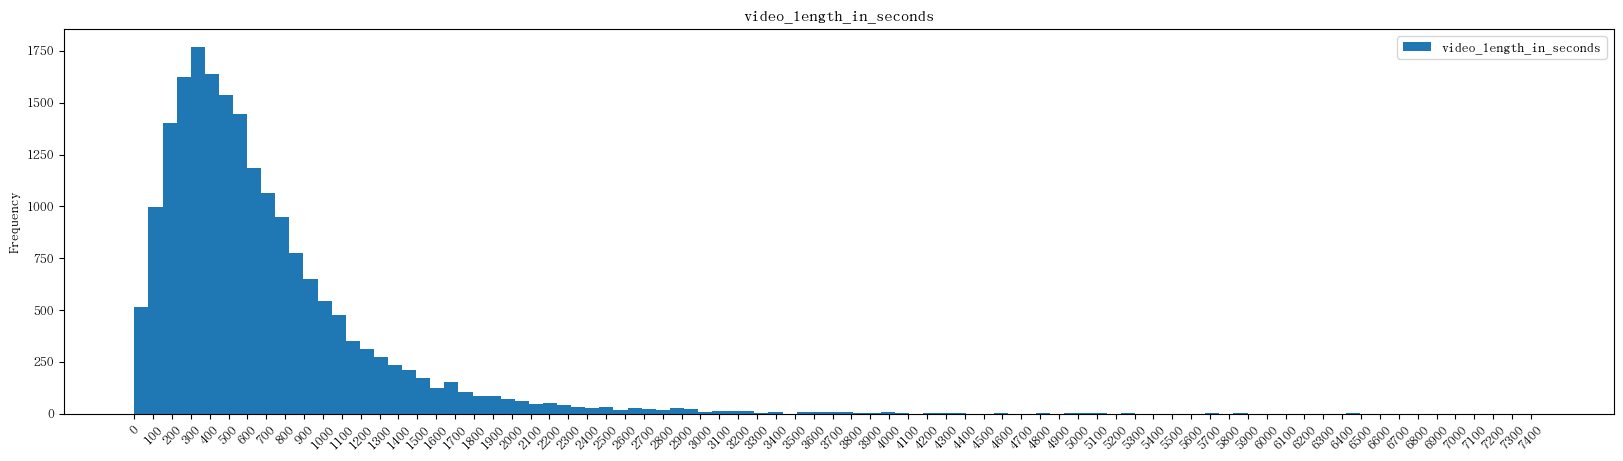

In [7]:
sub_eda1(course_chapter_items_df, ['video_length_in_seconds'])

### chapter_no

In [8]:
u1 = course_chapter_items_df[['course_id']].drop_duplicates().shape[0]
u2 = course_chapter_items_df[['course_id', 'chapter_no']].drop_duplicates().shape[0]
u3 = course_chapter_items_df[['course_id', 'chapter_no', 'chapter_id']].drop_duplicates().shape[0]
print(f'unique course_id:{u1}')
print(f'unique course_id + chapter_no:{u2}')
print(f'unique course_id + chapter_no + chapter_id:{u3}')

unique course_id:727
unique course_id + chapter_no:3080
unique course_id + chapter_no + chapter_id:3080


column: ['chapter_no']
.describe():


,chapter_no
count,21290.000000
mean,3.278018
std,3.062744
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,20.000000


.value_counts().describe():


,chapter_no
count,20.000000
mean,1064.500000
std,1983.003902
min,20.000000
25%,63.250000
50%,275.000000
75%,1088.250000
max,8570.000000


.value_counts() fold view:


,1_10,10_20
1,8570,253
2,2968,122
3,2668,99
4,1955,87
5,1476,65
6,959,58
7,692,41
8,514,39
9,381,26
10,297,20


.value_counts().plot()


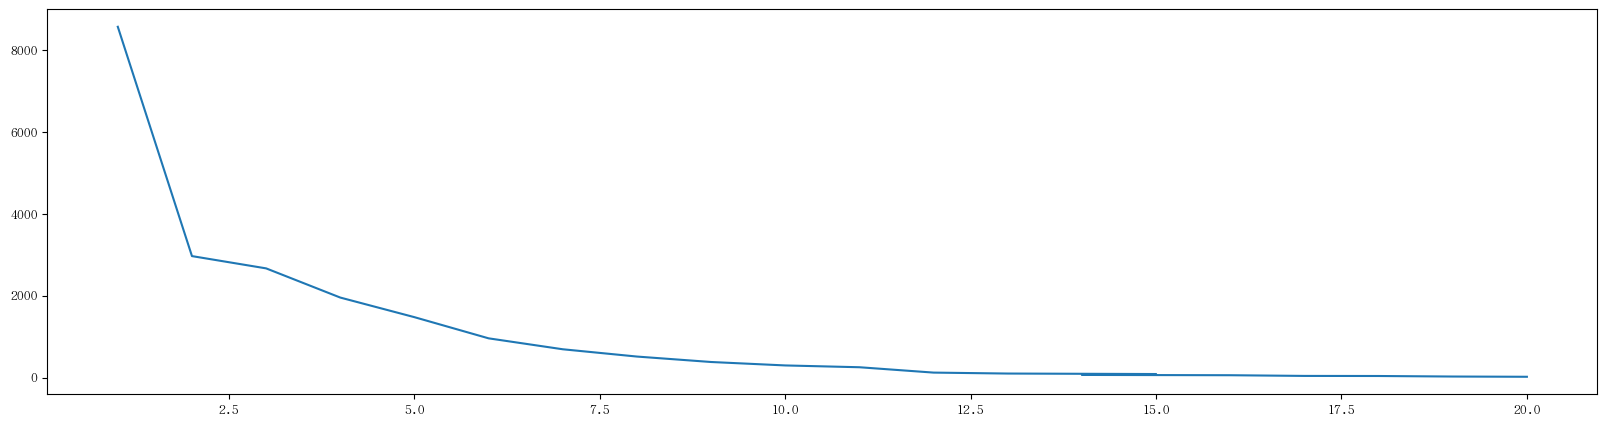

In [9]:
sub_eda2(course_chapter_items_df, ['chapter_no'])

#### chapter_name	

In [10]:
u1 = pd.unique(course_chapter_items_df.chapter_name).shape[0]
u2 = pd.unique(course_chapter_items_df.chapter_id).shape[0]
print(f"unique chapter_id:{u2}, chapter_name:{u1}")

unique chapter_id:3080, chapter_name:2703


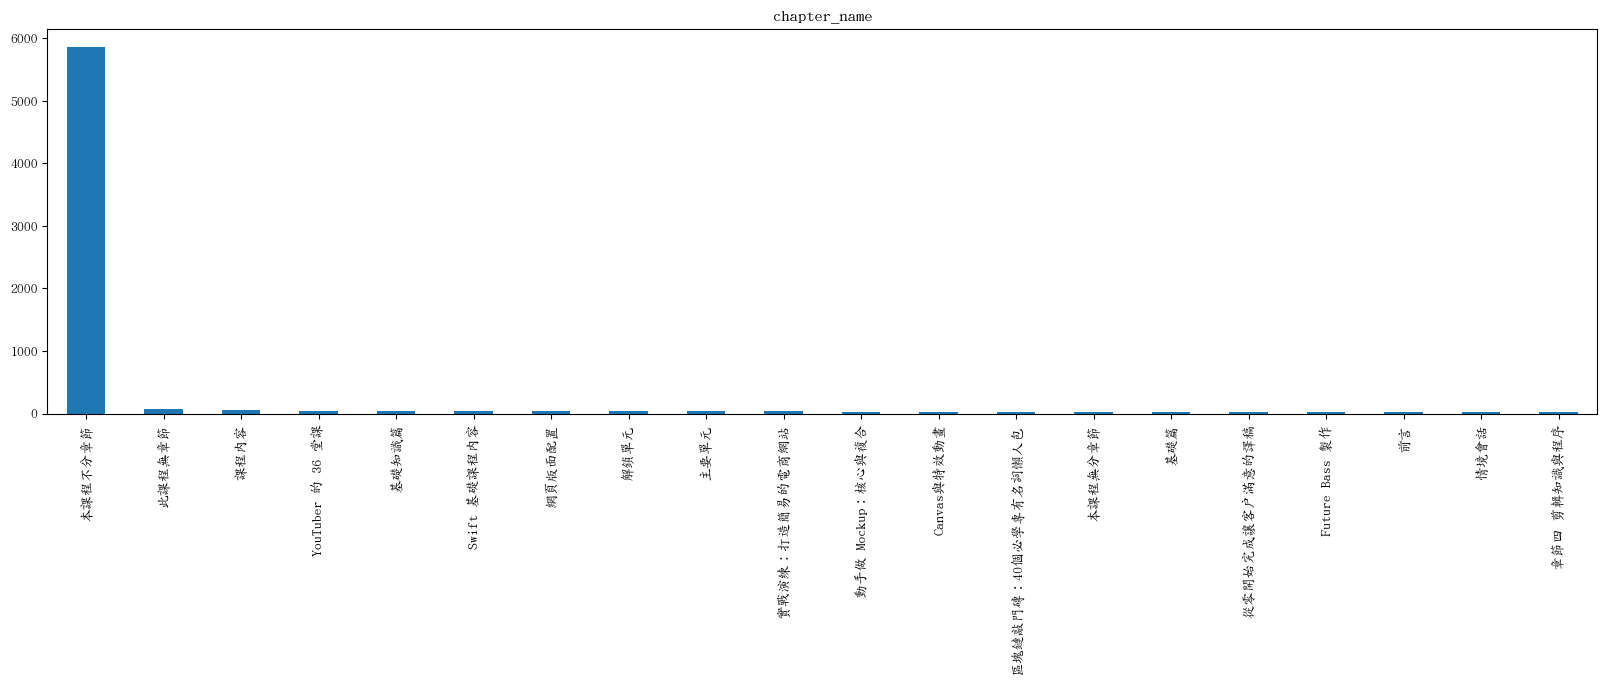

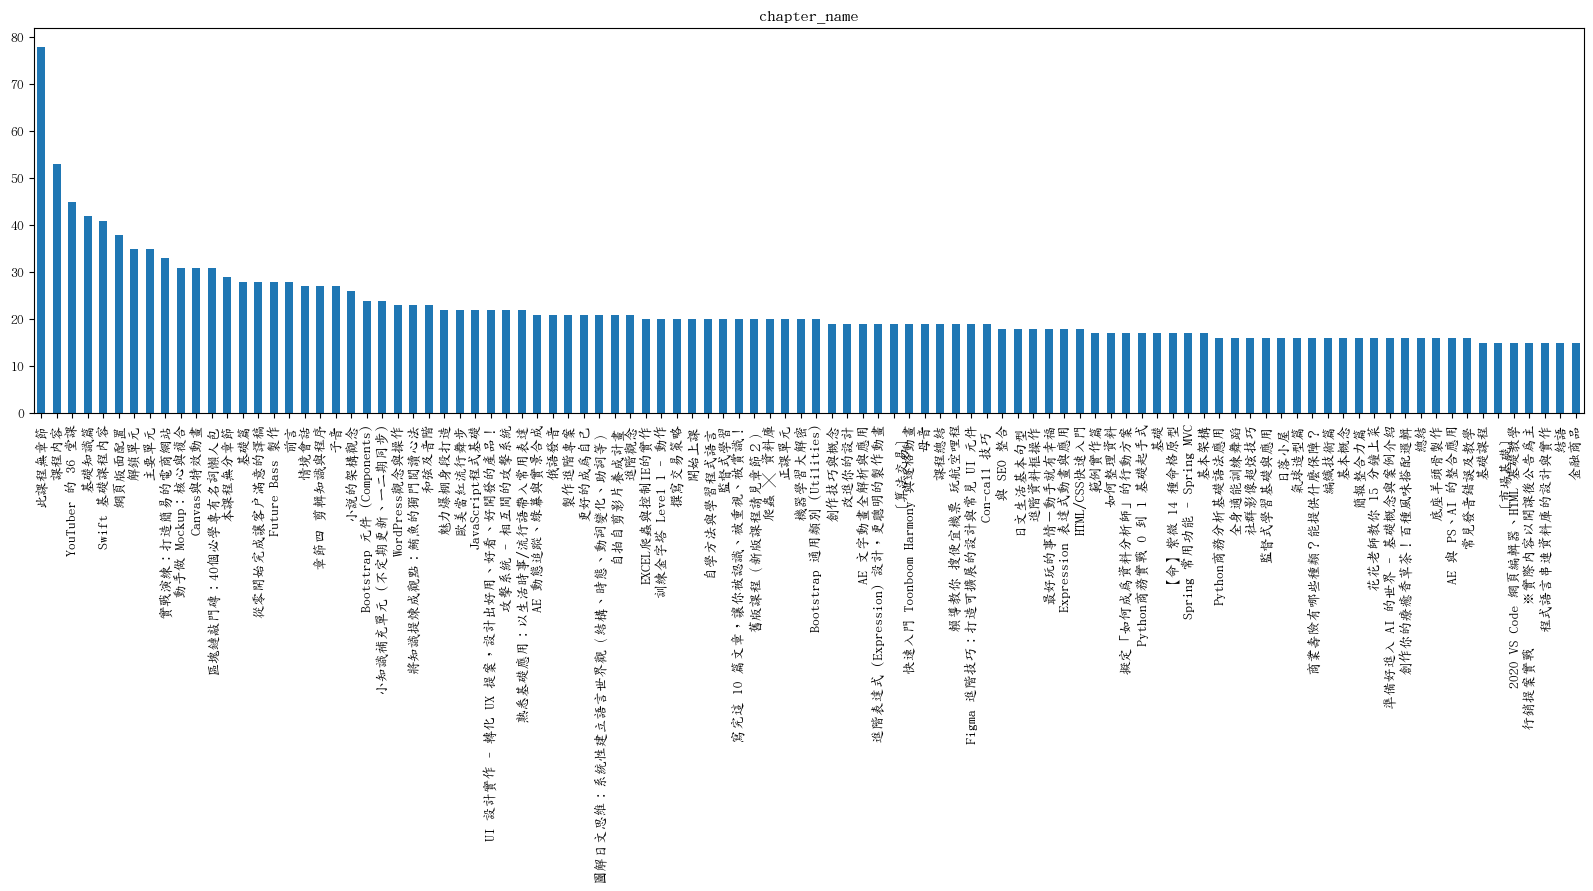

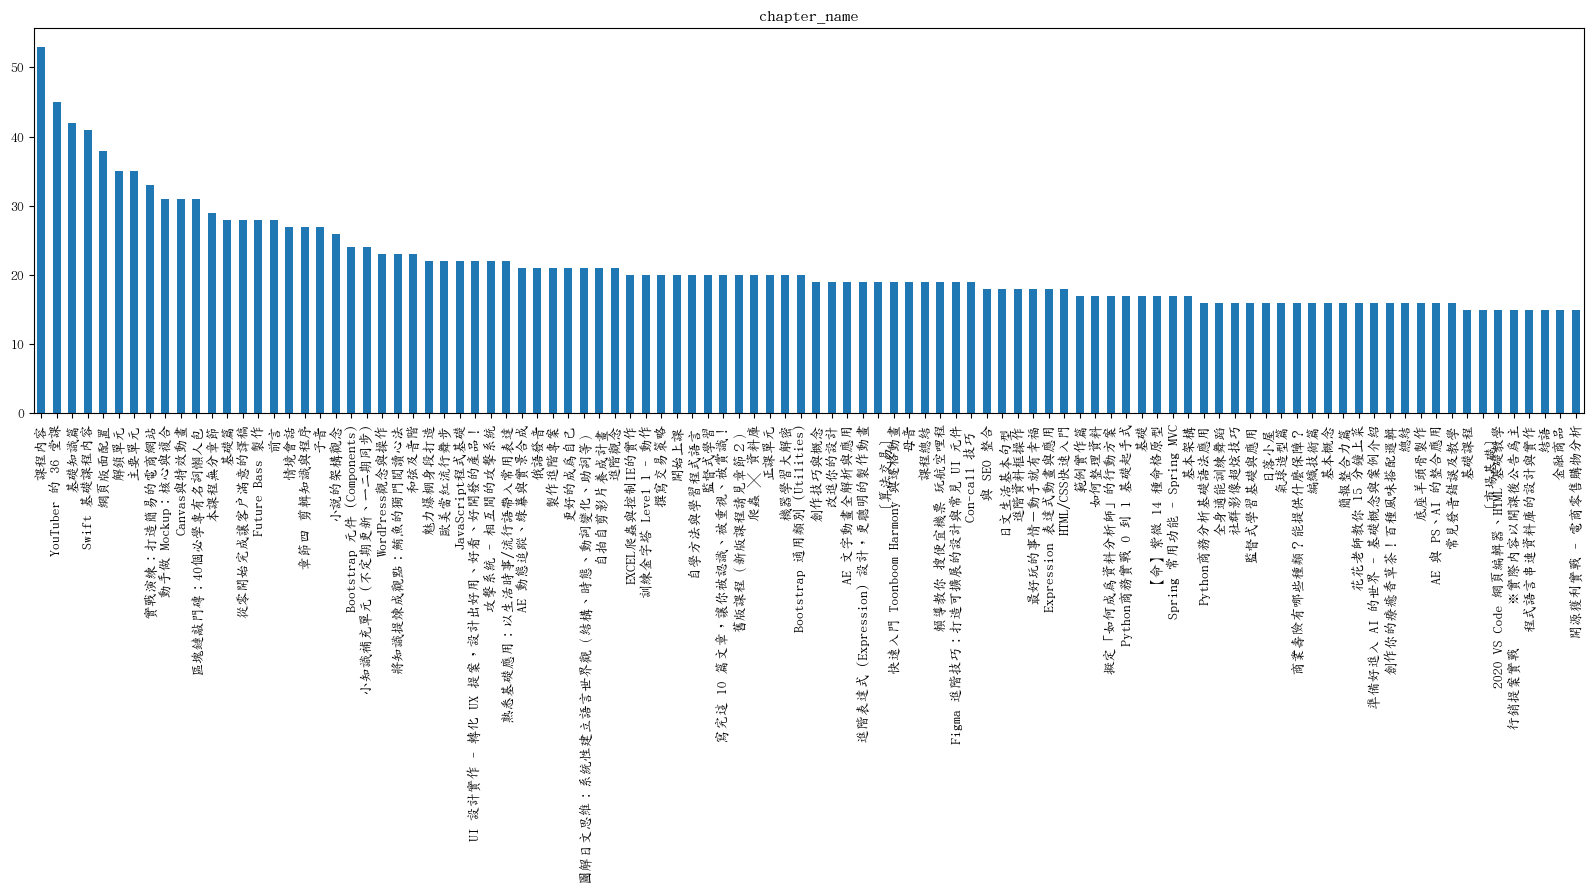

In [11]:
series = course_chapter_items_df.chapter_name.value_counts()[0:20]
series_bar(series, 'chapter_name')

series = course_chapter_items_df.chapter_name.value_counts()[1:101]
series_bar(series, 'chapter_name')

series = course_chapter_items_df.chapter_name.value_counts()[2:102]
series_bar(series, 'chapter_name')

# 資料前處理

In [170]:
# 將相同 chapter 的 items 依序串接在一起，
# 包含：'chapter_item_id', 'chapter_item_no', 'chapter_item_name', 'chapter_item_type', 'video_length_in_seconds'
# 另外額外算個 chapter 總秒數的 'video_length_in_seconds_sum'
from collections import defaultdict
course_chapter_items_df = pd.read_csv('./data/course_chapter_items.csv')

df = course_chapter_items_df
group_by_columns = ['course_id', 'chapter_no']
groups = df.groupby(group_by_columns)

chapter_item_id_sequence = defaultdict(list)
chapter_item_no_sequence = defaultdict(list)
chapter_item_name_sequence = defaultdict(list)
chapter_item_type_sequence = defaultdict(list)

video_length_in_seconds_sequence = defaultdict(list)
video_length_in_seconds_sum = defaultdict(float)

for group_key in sorted(groups.groups.keys()):
    group = groups.get_group(group_key)
    sorted_group = group.sort_values('chapter_item_no')
    chapter_item_id_sequence[group_key] = sorted_group.chapter_item_id.to_list()
    chapter_item_no_sequence[group_key] = sorted_group.chapter_item_no.to_list()
    chapter_item_name_sequence[group_key] = sorted_group.chapter_item_name.to_list()
    chapter_item_type_sequence[group_key] = sorted_group.chapter_item_type.to_list()
    
    video_length_in_seconds_sequence[group_key] = sorted_group.video_length_in_seconds.fillna(value=sorted_group.video_length_in_seconds.median()).to_list()
    video_length_in_seconds_sum[group_key] = sum(video_length_in_seconds_sequence[group_key])


df = df[['course_id', 'chapter_no', 'chapter_id', 'chapter_name']].drop_duplicates().copy()
df = df.set_index(keys = ["course_id","chapter_no"])

df['chapter_item_id_seq'] = [chapter_item_id_sequence[index] for index in df.index]
df['chapter_item_no_seq'] = [chapter_item_no_sequence[index] for index in df.index]
df['chapter_item_name_seq'] = [chapter_item_name_sequence[index] for index in df.index]
df['chapter_item_type_seq'] = [chapter_item_type_sequence[index] for index in df.index]
df['video_length_in_seconds_seq'] = [video_length_in_seconds_sequence[index] for index in df.index]
df['video_length_in_sum_seq'] = [video_length_in_seconds_sum[index] for index in df.index] 

/home/bonzo/venv/adl/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [180]:
mask = course_chapter_items_df.course_id.isin( ('61b941f2e8990300069e4e9e', '56189df9df7b3d0b005c6639', '61b941f2e8990300069e4e9e'))
df = course_chapter_items_df[mask].copy()





In [183]:
course_chapter_items_df.columns

Index(['course_id', 'chapter_no', 'chapter_id', 'chapter_name',
       'chapter_item_id', 'chapter_item_no', 'chapter_item_name',
       'chapter_item_type', 'video_length_in_seconds'],
      dtype='object')

In [164]:
groups.get_group(('54d5a117065a7e0e00725ac0', 1))

KeyError: ('54d5a117065a7e0e00725ac0', 1)

In [160]:
chapter_item_id_sequence[index]

[]

In [161]:
course_chapter_df.loc[index,'chapter_item_id_seq']

In [141]:
chapter_item_id_sequence#[('54d5a117065a7e0e00725ac0', 1)]

defaultdict(list,
            {('56189df9df7b3d0b005c6639', 1): ['5a1e1745a2c4b000589dd203'],
             ('56189df9df7b3d0b005c6639', 2): ['5a1e1745a2c4b000589dd204',
              '5a1e1745a2c4b000589dd205',
              '5a1e1745a2c4b000589dd206',
              '5a1e1745a2c4b000589dd207',
              '5a1e1745a2c4b000589dd208',
              '5a1e1745a2c4b000589dd209',
              '5a1e1745a2c4b000589dd20a'],
             ('56189df9df7b3d0b005c6639', 3): ['5a1e1745a2c4b000589dd20b',
              '5a1e1745a2c4b000589dd20c',
              '5a1e1745a2c4b000589dd20d',
              '5a1e1745a2c4b000589dd20e'],
             ('56189df9df7b3d0b005c6639', 4): ['5a1e1745a2c4b000589dd20f',
              '5a1e1745a2c4b000589dd210',
              '5a1e1745a2c4b000589dd211',
              '5a1e1745a2c4b000589dd212',
              '5a1e1745a2c4b000589dd213',
              '5a1e1745a2c4b000589dd214',
              '5a1e1745a2c4b000589dd215',
              '5a1e1745a2c4b000589dd216',
       

In [134]:
course_chapter_df

chapter_id  \
course_id                chapter_no                             
54d5a117065a7e0e00725ac0 1           5c91835bed65c200740eefda   
54d5d9952246e60a009ec571 1           5c91835bed65c200740eefdb   
54d7148a2246e60a009ec588 1           5c91835bed65c200740eefdc   
54f1268f4ec3c809002e4a29 1           5c91835bed65c200740eefe0   
551171a938239d1000577864 1           5c91835bed65c200740eefe6   
...                                                       ...   
61b941f2e8990300069e4e9e 7           61bc59b0ed9a730006500944   
                         8           61bc59d072cf2e0006cefdda   
                         9           61bc59e36b85090007be19d1   
                         10          61bc59f872cf2e0006cf110d   
                         11          61bc5a068eb373000634f586   

                                           chapter_name  \
course_id                chapter_no                       
54d5a117065a7e0e00725ac0 1                      本課程不分章節   
54d5d9952246e60a009ec571 1                      本課程不分章節   
54d7148a2246e60a009ec588 1                      本課程不分章節   
54f1268f4ec3c809002e4a29 1                      本課程不分章節   
551171a938239d1000577864 1                      本課程不分章節   
...                                                 ...   
61b941f2e8990300069e4e9e 7           原味魯斯迪克、巧克力夏威夷豆魯斯迪克   
                         8                      巧克力庫克洛夫   
                         9                         潘那朵尼   
                         10                        紅酒禮物   
                         11                    Lisa創業心法   

                                                                      chapter_item_ids  
course_id                chapter_no                                                     
54d5a117065a7e0e00725ac0 1                                                          []  
54d5d9952246e60a009ec571 1                                                          []  
54d7148a2246e60a009ec588 1                                                          []  
54f1268f4ec3c809002e4a29 1                                                          []  
551171a938239d1000577864 1                                                          []  
...                                                                                ...  
61b941f2e8990300069e4e9e 7           [61bc59b06b85090007bdfff8, 61bc59c98eb37300063...  
                         8           [61bc59d1ed9a730006501a61, 61bc59db8eb37300063...  
                         9           [61bc59e3fbb161000613781f, 61bc59eb8eb37300063...  
                         10          [61bc59f8fbb1610006138309, 61bc5a006b85090007b...  
                         11          [61bc5a0672cf2e0006cf17e3, 61bc5a118eb37300063...  

[3080 rows x 3 columns]

In [117]:
course_chapter_items_df['course_id', 'chapter_no', 'chapter_id', 'chapter_name',
       'chapter_item_id', 'chapter_item_no', 'chapter_item_name',
       'chapter_item_type', 'video_length_in_seconds']

,course_id,chapter_no,chapter_id,chapter_name,chapter_item_id,chapter_item_no,chapter_item_name,chapter_item_type,video_length_in_seconds
0,54d5a117065a7e0e00725ac0,1,5c91835bed65c200740eefda,本課程不分章節,5a1e172da2c4b000589dc7f2,1,拉曲線,LECTURE,578.0
1,54d5a117065a7e0e00725ac0,1,5c91835bed65c200740eefda,本課程不分章節,5a1e172da2c4b000589dc7f3,2,分割工具,LECTURE,479.0
2,54d5a117065a7e0e00725ac0,1,5c91835bed65c200740eefda,本課程不分章節,5a1e172da2c4b000589dc7f4,3,油漆桶上色工具,LECTURE,726.0
3,54d5a117065a7e0e00725ac0,1,5c91835bed65c200740eefda,本課程不分章節,5a1e172da2c4b000589dc7f5,4,幾何圖形分割 X 色塊組合,ASSIGNMENT,56.0
4,54d5d9952246e60a009ec571,1,5c91835bed65c200740eefdb,本課程不分章節,5a1e1704a2c4b000589dae2a,1,作品範例,LECTURE,165.0
...,...,...,...,...,...,...,...,...,...
21285,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61bc5a006b85090007be2942,2,紅酒禮物：麵團材料、本種攪拌、基本發酵,LECTURE,746.0
21286,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61c42b14b59e7c00064b84bc,3,紅酒禮物：分割、整型、烘烤,LECTURE,560.0
21287,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61c5453b7629ab0007652db9,4,【試做紅酒禮物】,ASSIGNMENT,NaN
21288,61b941f2e8990300069e4e9e,11,61bc5a068eb373000634f586,Lisa創業心法,61bc5a0672cf2e0006cf17e3,1,味覺の感動品牌定位／商品行銷／商品包裝,LECTURE,276.0


In [116]:
course_chapter_items_df.columns

Index(['course_id', 'chapter_no', 'chapter_id', 'chapter_name',
       'chapter_item_id', 'chapter_item_no', 'chapter_item_name',
       'chapter_item_type', 'video_length_in_seconds'],
      dtype='object')

In [114]:
group_key = sorted(groups.groups.keys())[3]
group = groups.get_group(group_key)
sorted_group = group.sort_values('chapter_item_no')
#sorted_group.video_length_in_seconds.fillna(value=sorted_group.video_length_in_seconds.median())
sorted_group.video_length_in_seconds.fillna(value=sorted_group.video_length_in_seconds.median()).to_list()

[365.0,
 695.0,
 215.0,
 326.0,
 585.0,
 506.0,
 661.0,
 365.0,
 478.0,
 1551.0,
 506.0,
 708.0]

In [106]:
sorted_group.video_length_in_seconds

307     365.0
308     695.0
309     215.0
310     326.0
311     585.0
312     506.0
313     661.0
314     365.0
315     478.0
316    1551.0
317       NaN
318     708.0
Name: video_length_in_seconds, dtype: float64

In [89]:
chapter_item_name_sequence

defaultdict(list,
            {('56189df9df7b3d0b005c6639',
              1): ['最新公告區(2016/1/26)-點擊"講義"查看最新課程消息 '],
             ('56189df9df7b3d0b005c6639', 2): ['楔子 - 課程進行模式說明',
              '楔子 - 網頁前後端如何運作',
              '基礎前期規劃 - 網站專案開發流程',
              '基礎前期規劃 - 網站主題名稱logo',
              '基礎前期規劃 - 網站瀏覽結構樹規劃',
              '基礎前期規劃 - 網站排版規劃與分類',
              '基礎前期規劃 - 網站視覺配色概念與資源'],
             ('56189df9df7b3d0b005c6639', 3): ['本機環境架設 - sublime 操作與瀏覽器預覽網頁',
              '本機環境架設 - 伺服器瀏覽與原理講解',
              'Codepen 環境架設 - 平台介紹/註冊與基礎設定',
              'Codepen 環境架設 - 實際使用sublime中快速鍵'],
             ('56189df9df7b3d0b005c6639', 4): ['html中元素&排列的概念',
              'html中結構&層級的概念',
              '<Project 0> 簡易版本自我介紹',
              'css 直接調整外觀與顏色框線',
              'css 分開撰寫 - class&id概念',
              'css 顯示方式 display block/inline',
              'css 元素位置 - 相對 / 絕對定位',
              'css 內間隔/外間隔(padding/margin)',
              'css 字體變化與span - 在文章段落中製作變化',
              '<P

In [70]:
list(groups.groups.keys()).next()

AttributeError: 'list' object has no attribute 'next'

In [66]:
dir(groups.groups.keys()__ne__()

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'isdisjoint']

In [53]:
chapters.get_group(('56189df9df7b3d0b005c6639', 2))

,course_id,chapter_no,chapter_id,chapter_name,chapter_item_id,chapter_item_no,chapter_item_name,chapter_item_type,video_length_in_seconds
296,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd204,1,楔子 - 課程進行模式說明,LECTURE,180.0
297,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd205,2,楔子 - 網頁前後端如何運作,LECTURE,355.0
298,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd206,3,基礎前期規劃 - 網站專案開發流程,LECTURE,600.0
299,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd207,4,基礎前期規劃 - 網站主題名稱logo,LECTURE,380.0
300,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd208,5,基礎前期規劃 - 網站瀏覽結構樹規劃,LECTURE,197.0
301,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd209,6,基礎前期規劃 - 網站排版規劃與分類,LECTURE,560.0
302,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd20a,7,基礎前期規劃 - 網站視覺配色概念與資源,LECTURE,460.0


[('56189df9df7b3d0b005c6639', 1),
 ('56189df9df7b3d0b005c6639', 2),
 ('56189df9df7b3d0b005c6639', 3),
 ('56189df9df7b3d0b005c6639', 4),
 ('56189df9df7b3d0b005c6639', 5),
 ('56189df9df7b3d0b005c6639', 6),
 ('56189df9df7b3d0b005c6639', 7),
 ('56189df9df7b3d0b005c6639', 8),
 ('56189df9df7b3d0b005c6639', 9),
 ('56189df9df7b3d0b005c6639', 10),
 ('56189df9df7b3d0b005c6639', 11),
 ('56189df9df7b3d0b005c6639', 12),
 ('56189df9df7b3d0b005c6639', 13),
 ('61b941f2e8990300069e4e9e', 1),
 ('61b941f2e8990300069e4e9e', 2),
 ('61b941f2e8990300069e4e9e', 3),
 ('61b941f2e8990300069e4e9e', 4),
 ('61b941f2e8990300069e4e9e', 5),
 ('61b941f2e8990300069e4e9e', 6),
 ('61b941f2e8990300069e4e9e', 7),
 ('61b941f2e8990300069e4e9e', 8),
 ('61b941f2e8990300069e4e9e', 9),
 ('61b941f2e8990300069e4e9e', 10),
 ('61b941f2e8990300069e4e9e', 11)]

In [59]:
for group in sorted(chapters.groups.keys())

def concate_column(x):
    return [_ for _ in x]
chapters.get_group(('56189df9df7b3d0b005c6639', 2)).apply(concate_column, axis=0)

,course_id,chapter_no,chapter_id,chapter_name,chapter_item_id,chapter_item_no,chapter_item_name,chapter_item_type,video_length_in_seconds
296,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd204,1,楔子 - 課程進行模式說明,LECTURE,180.0
297,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd205,2,楔子 - 網頁前後端如何運作,LECTURE,355.0
298,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd206,3,基礎前期規劃 - 網站專案開發流程,LECTURE,600.0
299,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd207,4,基礎前期規劃 - 網站主題名稱logo,LECTURE,380.0
300,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd208,5,基礎前期規劃 - 網站瀏覽結構樹規劃,LECTURE,197.0
301,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd209,6,基礎前期規劃 - 網站排版規劃與分類,LECTURE,560.0
302,56189df9df7b3d0b005c6639,2,5c91b460728ddf00208ba180,楔子 & 基礎前期規劃,5a1e1745a2c4b000589dd20a,7,基礎前期規劃 - 網站視覺配色概念與資源,LECTURE,460.0


[('56189df9df7b3d0b005c6639', 1),
 ('56189df9df7b3d0b005c6639', 2),
 ('56189df9df7b3d0b005c6639', 3),
 ('56189df9df7b3d0b005c6639', 4),
 ('56189df9df7b3d0b005c6639', 5),
 ('56189df9df7b3d0b005c6639', 6),
 ('56189df9df7b3d0b005c6639', 7),
 ('56189df9df7b3d0b005c6639', 8),
 ('56189df9df7b3d0b005c6639', 9),
 ('56189df9df7b3d0b005c6639', 10),
 ('56189df9df7b3d0b005c6639', 11),
 ('56189df9df7b3d0b005c6639', 12),
 ('56189df9df7b3d0b005c6639', 13),
 ('61b941f2e8990300069e4e9e', 1),
 ('61b941f2e8990300069e4e9e', 2),
 ('61b941f2e8990300069e4e9e', 3),
 ('61b941f2e8990300069e4e9e', 4),
 ('61b941f2e8990300069e4e9e', 5),
 ('61b941f2e8990300069e4e9e', 6),
 ('61b941f2e8990300069e4e9e', 7),
 ('61b941f2e8990300069e4e9e', 8),
 ('61b941f2e8990300069e4e9e', 9),
 ('61b941f2e8990300069e4e9e', 10),
 ('61b941f2e8990300069e4e9e', 11)]

In [46]:
chapters# = course_chapter_items_df.groupby(['course_id', 'chapter_no'])

In [44]:
course_chapter_items_df[course_chapter_items_df.chapter_no >3]

,course_id,chapter_no,chapter_id,chapter_name,chapter_item_id,chapter_item_no,chapter_item_name,chapter_item_type,video_length_in_seconds
307,56189df9df7b3d0b005c6639,4,5c91b50a1a3ca10020055f17,基礎HTML/CSS,5a1e1745a2c4b000589dd20f,1,html中元素&排列的概念,LECTURE,365.0
308,56189df9df7b3d0b005c6639,4,5c91b50a1a3ca10020055f17,基礎HTML/CSS,5a1e1745a2c4b000589dd210,2,html中結構&層級的概念,LECTURE,695.0
309,56189df9df7b3d0b005c6639,4,5c91b50a1a3ca10020055f17,基礎HTML/CSS,5a1e1745a2c4b000589dd211,3,<Project 0> 簡易版本自我介紹,LECTURE,215.0
310,56189df9df7b3d0b005c6639,4,5c91b50a1a3ca10020055f17,基礎HTML/CSS,5a1e1745a2c4b000589dd212,4,css 直接調整外觀與顏色框線,LECTURE,326.0
311,56189df9df7b3d0b005c6639,4,5c91b50a1a3ca10020055f17,基礎HTML/CSS,5a1e1745a2c4b000589dd213,5,css 分開撰寫 - class&id概念,LECTURE,585.0
...,...,...,...,...,...,...,...,...,...
21285,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61bc5a006b85090007be2942,2,紅酒禮物：麵團材料、本種攪拌、基本發酵,LECTURE,746.0
21286,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61c42b14b59e7c00064b84bc,3,紅酒禮物：分割、整型、烘烤,LECTURE,560.0
21287,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61c5453b7629ab0007652db9,4,【試做紅酒禮物】,ASSIGNMENT,NaN
21288,61b941f2e8990300069e4e9e,11,61bc5a068eb373000634f586,Lisa創業心法,61bc5a0672cf2e0006cf17e3,1,味覺の感動品牌定位／商品行銷／商品包裝,LECTURE,276.0


In [15]:
course_chapter_items_df

,course_id,chapter_no,chapter_id,chapter_name,chapter_item_id,chapter_item_no,chapter_item_name,chapter_item_type,video_length_in_seconds
0,54d5a117065a7e0e00725ac0,1,5c91835bed65c200740eefda,本課程不分章節,5a1e172da2c4b000589dc7f2,1,拉曲線,LECTURE,578.0
1,54d5a117065a7e0e00725ac0,1,5c91835bed65c200740eefda,本課程不分章節,5a1e172da2c4b000589dc7f3,2,分割工具,LECTURE,479.0
2,54d5a117065a7e0e00725ac0,1,5c91835bed65c200740eefda,本課程不分章節,5a1e172da2c4b000589dc7f4,3,油漆桶上色工具,LECTURE,726.0
3,54d5a117065a7e0e00725ac0,1,5c91835bed65c200740eefda,本課程不分章節,5a1e172da2c4b000589dc7f5,4,幾何圖形分割 X 色塊組合,ASSIGNMENT,56.0
4,54d5d9952246e60a009ec571,1,5c91835bed65c200740eefdb,本課程不分章節,5a1e1704a2c4b000589dae2a,1,作品範例,LECTURE,165.0
...,...,...,...,...,...,...,...,...,...
21285,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61bc5a006b85090007be2942,2,紅酒禮物：麵團材料、本種攪拌、基本發酵,LECTURE,746.0
21286,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61c42b14b59e7c00064b84bc,3,紅酒禮物：分割、整型、烘烤,LECTURE,560.0
21287,61b941f2e8990300069e4e9e,10,61bc59f872cf2e0006cf110d,紅酒禮物,61c5453b7629ab0007652db9,4,【試做紅酒禮物】,ASSIGNMENT,NaN
21288,61b941f2e8990300069e4e9e,11,61bc5a068eb373000634f586,Lisa創業心法,61bc5a0672cf2e0006cf17e3,1,味覺の感動品牌定位／商品行銷／商品包裝,LECTURE,276.0
